In [1]:
import pandas as pd

from mitotic_classifer import *

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Running SVM model with file:#
## check the number of M and G2 cells

In [3]:
df_ori_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')

df_ori_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_final_data.csv')
df_cellcyle_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_singlecell_cellcycle.csv')
df_ori_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_final_data.csv')
df_cellcyle_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_singlecell_cellcycle.csv')

In [5]:
df_ori=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/single_cell_data/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288,...,24288,24288,24288,24288,24288,24288,24288,24288,24288,24288
G1,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840,...,92840,92840,92840,92840,92840,92840,92840,92840,92840,92840
G2,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363,...,35363,35363,35363,35363,35363,35363,35363,35363,35363,35363
Late S,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978,...,16978,16978,16978,16978,16978,16978,16978,16978,16978,16978
M,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459,...,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459
Polyploid,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415,...,7415,7415,7415,7415,7415,7415,7415,7415,7415,7415
Polyploid (replicating),3799,3799,3799,3799,3799,3799,3799,3799,3799,3799,...,3799,3799,3799,3799,3799,3799,3799,3799,3799,3799
Sub-G1,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,...,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921


In [6]:
df_all_230109=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_221108_p1=merge_data(df1=df_ori_221108_P1,df2=df_cellcyle_221108_P1,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_221108_p2=merge_data(df1=df_ori_221108_P2,df2=df_cellcyle_221108_P2,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_221108_p2

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,concentration,label,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,4.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,E4,11475,399530.0,U2OS,ISCU,1.0,12.0,...,0.984065,-0.023174,0.986987,-0.018897,0.936296,-0.094964,1.280905,0.357164,G2,G2/M
1,0.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,E4,11475,399530.0,U2OS,ISCU,1.0,8.0,...,2.937273,1.554477,0.982742,-0.025116,0.952111,-0.070798,0.818504,-0.288939,Early S,S
2,1.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,E4,11475,399530.0,U2OS,ISCU,1.0,10.0,...,1.008407,0.012078,1.001932,0.002784,1.927419,0.946670,1.605118,0.682679,G2,G2/M
5,6.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,E4,11475,399530.0,U2OS,ISCU,1.0,15.0,...,2.279890,1.188964,0.997816,-0.003154,1.565765,0.646867,1.206496,0.270823,Early S,S
6,12.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,E4,11475,399530.0,U2OS,ISCU,1.0,23.0,...,2.715825,1.441390,0.986754,-0.019238,0.951057,-0.072396,1.089567,0.123755,Late S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,116.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,H3,11428,399116.0,RPE-1,GAPD CTL,1.0,138.0,...,1.004742,0.006826,1.000615,0.000887,2.105672,1.074281,1.296199,0.374287,G2,G2/M
1674,115.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,H3,11428,399116.0,RPE-1,GAPD CTL,1.0,137.0,...,1.008578,0.012323,0.986272,-0.019943,1.078007,0.108367,0.910843,-0.134726,G1,G1
1675,117.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,H3,11428,399116.0,RPE-1,GAPD CTL,1.0,139.0,...,0.986110,-0.020179,0.986679,-0.019347,1.783659,0.834840,1.078998,0.109692,G1,G1
1676,118.0,221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs,1056,H3,11428,399116.0,RPE-1,GAPD CTL,1.0,140.0,...,0.990839,-0.013278,0.990354,-0.013984,2.287944,1.194052,1.324225,0.405148,G1,G1


In [7]:
df_all=pd.concat([df_all_221108_p1,df_all_221108_p2,df_all_230109]).sample(frac=1).reset_index(drop=True)
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle,concentration
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,114457,114457,114457,114457,114457,114457,114457,114457,114457,114457,...,114457,114457,114457,114457,114457,114457,114457,114457,114457,27225
G1,305085,305085,305085,305085,305085,305085,305085,305085,305085,305085,...,305085,305085,305085,305085,305085,305085,305085,305085,305085,62046
G2,108113,108113,108113,108113,108113,108113,108113,108113,108113,108113,...,108113,108113,108113,108113,108113,108113,108113,108113,108113,23922
Late S,66203,66203,66203,66203,66203,66203,66203,66203,66203,66203,...,66203,66203,66203,66203,66203,66203,66203,66203,66203,15708
M,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,...,8757,8757,8757,8757,8757,8757,8757,8757,8757,1164
Polyploid,11299,11299,11299,11299,11299,11299,11299,11299,11299,11299,...,11299,11299,11299,11299,11299,11299,11299,11299,11299,2353
Polyploid (replicating),6966,6966,6966,6966,6966,6966,6966,6966,6966,6966,...,6966,6966,6966,6966,6966,6966,6966,6966,6966,1740
Sub-G1,7880,7880,7880,7880,7880,7880,7880,7880,7880,7880,...,7880,7880,7880,7880,7880,7880,7880,7880,7880,2251


## Merge two files

In [3]:
df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,0.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,13.0,136.0,...,0.968335,-0.046422,0.949624,-0.074571,1.462911,0.548842,1.120828,0.164565,G2,G2/M
1,1.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,16.0,147.0,...,0.917730,-0.123858,0.929528,-0.105430,2.604441,1.380974,1.211483,0.276774,G1,G1
2,2.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,17.0,98.0,...,4.848917,2.277662,0.985389,-0.021235,1.033012,0.046856,0.807655,-0.308188,Late S,S
3,5.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,20.0,203.0,...,1.000066,0.000095,0.952695,-0.069913,1.938723,0.955107,1.673000,0.742438,Polyploid,Polyploid
4,4.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,19.0,130.0,...,1.003778,0.005440,0.969189,-0.045151,1.755076,0.811534,1.071380,0.099470,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,262.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,304.0,314.0,...,0.968910,-0.045565,0.985267,-0.021413,1.205830,0.270027,1.851099,0.888382,G2,G2/M
1783,261.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,303.0,246.0,...,2.431181,1.281657,1.023444,0.033433,1.647256,0.720065,1.450224,0.536276,Late S,S
1784,265.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,308.0,309.0,...,1.039146,0.055399,0.993885,-0.008849,1.224424,0.292103,1.821623,0.865224,G2,G2/M
1785,267.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,311.0,473.0,...,1.100063,0.137586,1.009845,0.014134,2.805569,1.488294,2.788439,1.479458,Polyploid,Polyploid


In [4]:
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771,...,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771
G1,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081,...,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081
G2,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261,...,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261
Late S,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347,...,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347
M,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
Polyploid,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982,...,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982
Polyploid (replicating),1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Sub-G1,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640


## select all the M cell and equal number G2 cells, extracting the interesting columns making a dataset for training

In [12]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(8757)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
                                                                                                                      'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell', 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_EdU_nucleus,intensity_max_EdU_cell,intensity_mean_EdU_cell,intensity_max_EdU_cyto,intensity_mean_EdU_cyto,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,U2OS,QRICH1,65.0,252.0,13898.203421,9920.140956,2.499876e+06,711.0,13898.203421,4494.146639,...,788.681013,922.708600,759.307755,920.628136,743.181261,3.925983,0.998980,0.818219,1.501069,G2
1,U2OS,IPO9,265.0,225.0,18623.387621,11894.287372,2.676215e+06,1194.0,18623.387621,3434.981588,...,746.091630,864.398937,721.759571,849.290734,716.109712,4.350618,0.974232,1.258938,1.195866,G2
2,RPE-1,siCdc27,218.0,199.0,21664.578914,9704.798690,1.931255e+06,842.0,21664.578914,3700.052971,...,1075.790695,1298.494729,891.127377,1270.851585,832.585348,3.633872,1.207950,0.579845,1.173149,M
3,RPE-1,IPO9,71.0,195.0,13031.192551,8946.035298,1.744477e+06,2318.0,13031.192551,1524.680402,...,703.102593,798.058609,647.612714,798.058609,642.515905,4.151406,1.026207,2.011933,1.366264,G2
4,U2OS,CDC27,188.0,104.0,29246.978014,18694.468318,1.944225e+06,217.0,40744.831163,11845.005513,...,787.493742,867.055959,768.249361,855.122931,747.572196,3.053349,0.991617,0.249724,0.619489,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17509,RPE-1,C16orf72,156.0,212.0,11853.633425,8201.716919,1.738764e+06,2130.0,11853.633425,1532.404771,...,745.120668,851.240711,671.091065,851.240711,662.908439,3.778075,1.070960,1.848756,1.298183,G2
17510,U2OS,CDC27,586.0,130.0,26367.872891,17082.752320,2.220758e+06,441.0,26367.872891,6845.273567,...,799.477959,942.775224,732.450547,862.647662,704.432658,3.487636,1.068359,0.507503,0.774361,M
17511,RPE-1,siCdc27,332.0,253.0,23742.034949,10302.070689,2.606424e+06,469.0,23742.034949,6977.552352,...,1036.302165,1161.924697,964.403922,1073.227080,880.189777,4.904278,1.100677,0.322978,1.491491,M
17512,RPE-1,FNTA,282.0,187.0,10917.523696,7718.145094,1.443293e+06,1373.0,10917.523696,1747.101588,...,707.246425,820.536455,671.720201,820.536455,666.118680,3.136061,1.011624,1.191710,1.145095,G2


In [13]:




scaler = StandardScaler()
X_std = scaler.fit_transform(data[['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',]])

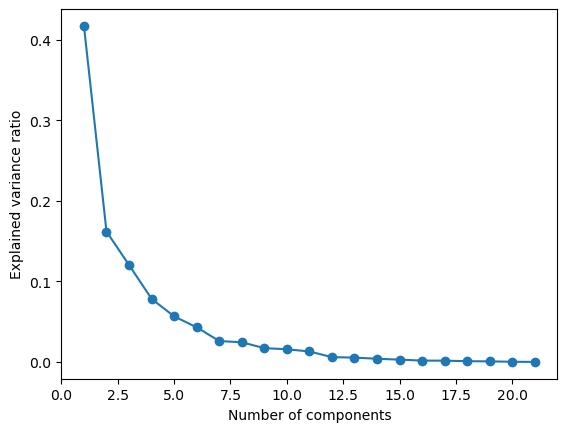

In [14]:
# Create a PCA object with no limit on the number of components
pca = PCA()

# Fit the PCA model to the standardized data
pca.fit(X_std)

# Plot the explained variance ratio for each component
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()







In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',]], data['cell_cycle_detailed'], test_size=0.3)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a PCA object with the desired number of components
pca = PCA(n_components=15)

# Fit the PCA model to the training data and transform the training and testing data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train a logistic regression model on the transformed training data
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
clf_svm_hp.fit(X_train_pca, y_train)

# Predict the labels of the transformed testing data
y_pred = clf_svm_hp.predict(X_test_pca)

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy: {:.2f}".format(accuracy))

Classification accuracy: 0.89


In [17]:


# Get the components matrix
components = pca.components_

# Print the contribution of each original feature to each component
for i in range(components.shape[0]):
    print(f"Component {i+1}:")
    for j in range(components.shape[1]):
        print(f"   Feature {j+1}: {components[i, j]}")

Component 1:
   Feature 1: 0.28162389364666923
   Feature 2: 0.27876799990590123
   Feature 3: 0.0724451177099765
   Feature 4: 0.2815934342213591
   Feature 5: 0.28538736437538703
   Feature 6: -0.08554872609428235
   Feature 7: 0.28803784199364735
   Feature 8: 0.29676085365921734
   Feature 9: 0.2817225641458175
   Feature 10: 0.27558686397618376
   Feature 11: 0.24190288579599903
   Feature 12: 0.18080744039985125
   Feature 13: 0.09081238966473784
   Feature 14: 0.22307854644890607
   Feature 15: 0.0722353650260979
   Feature 16: 0.20491480151387206
   Feature 17: 0.07504059026962154
   Feature 18: 0.20254972245236505
   Feature 19: -0.19150587441700717
   Feature 20: 0.0961884654833339
   Feature 21: -0.23304222832604538
Component 2:
   Feature 1: -0.10173699878510463
   Feature 2: -0.11523147880300737
   Feature 3: 0.19064225621959396
   Feature 4: -0.1016984584721418
   Feature 5: -0.05482095956364931
   Feature 6: 0.14430388179141249
   Feature 7: -0.08689395043331413
   Featu

the accuracy of model run with train data 0.936699567664573
the accuracy of model run with test data 0.8941960038058991


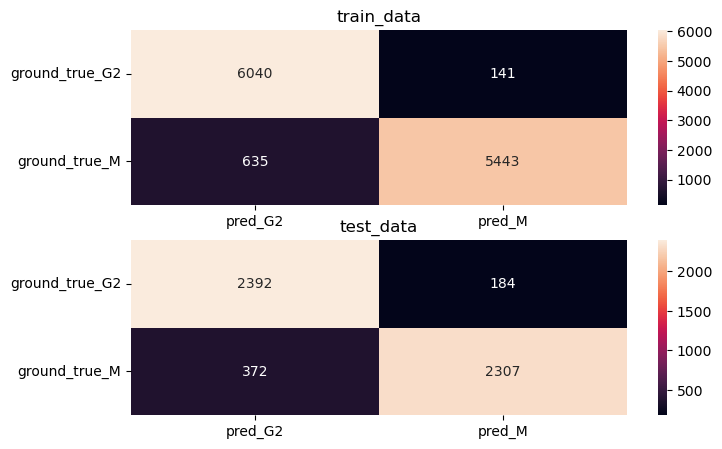

In [16]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu_2.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu_2.joblib')
check_classifier(clf=pretrained_svm,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

# input data (8757 G2 cell + 8757 M cell)
##  cross validation

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.89126712 0.89640411 0.91438356 0.89726027 0.88356164 0.9135274
 0.89717224 0.9117395  0.88860326 0.89545844]  Mean:0.8989377545750138


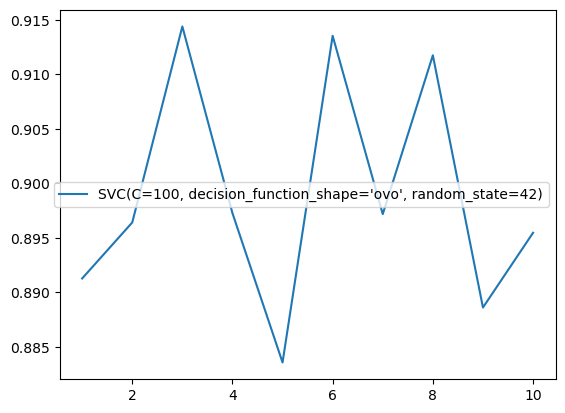

In [7]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

In [9]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24)
clf_svm_hp =GridSearchCV(clf_svm,{'C':[0.1,10,100],"gamma":['scale','auto'],'decision_function_shape':['ovo','ovr'],},cv=5,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.305336,0.051738,0.781014,0.004265,0.1,ovo,scale,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.578767,0.579872,...,0.580336,0.005691,5,0.578373,0.583770,0.566321,0.586019,0.579916,0.578880,0.006840
1,1.676592,0.066550,0.716466,0.006023,0.1,ovo,auto,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.500000,0.499786,...,0.499829,0.000086,7,1.000000,0.500054,0.500054,0.500054,0.500054,0.600043,0.199979
2,2.291950,0.030378,0.782789,0.001966,0.1,ovr,scale,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.578767,0.579872,...,0.580336,0.005691,5,0.578373,0.583770,0.566321,0.586019,0.579916,0.578880,0.006840
3,1.649476,0.017337,0.720654,0.004680,0.1,ovr,auto,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.500000,0.499786,...,0.499829,0.000086,7,1.000000,0.500054,0.500054,0.500054,0.500054,0.600043,0.199979
4,1.067107,0.014815,0.363127,0.003906,10,ovo,scale,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.874572,0.863383,...,0.874872,0.008681,3,0.875589,0.877636,0.873247,0.877101,0.872498,0.875214,0.002040
5,1.821701,0.112953,0.721921,0.003321,10,ovo,auto,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.500000,0.499786,...,0.499829,0.000086,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,1.080682,0.027153,0.364413,0.004893,10,ovr,scale,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.874572,0.863383,...,0.874872,0.008681,3,0.875589,0.877636,0.873247,0.877101,0.872498,0.875214,0.002040
7,1.791305,0.073729,0.726727,0.002172,10,ovr,auto,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.500000,0.499786,...,0.499829,0.000086,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.853127,0.025624,0.267701,0.004015,100,ovo,scale,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.880993,0.874518,...,0.883094,0.008993,1,0.883833,0.886094,0.883417,0.885237,0.879563,0.883629,0.002248
9,1.803533,0.077974,0.724564,0.002968,100,ovo,auto,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.500000,0.499786,...,0.499829,0.000086,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [9]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104675,0.013023,0.003336,0.000458,balanced,entropy,sqrt,30,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939804,0.003242,41,0.999565,0.999130,0.999130,0.999130,0.99913,0.999217,0.000174
1,0.128809,0.010494,0.003484,0.000059,balanced,entropy,sqrt,40,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.939802,0.006309,45,1.000000,0.999130,0.999565,0.999565,1.00000,0.999652,0.000326
2,0.155632,0.004385,0.004105,0.000320,balanced,entropy,sqrt,50,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006489,25,1.000000,0.999565,1.000000,1.000000,1.00000,0.999913,0.000174
3,0.182327,0.001748,0.004492,0.000054,balanced,entropy,sqrt,60,"{'class_weight': 'balanced', 'criterion': 'ent...",0.937391,...,0.940498,0.006763,25,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,0.226705,0.029221,0.005175,0.000247,balanced,entropy,sqrt,70,"{'class_weight': 'balanced', 'criterion': 'ent...",0.939130,...,0.940149,0.006787,37,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.205552,0.004281,0.004579,0.000086,balanced_subsample,log_loss,log2,60,"{'class_weight': 'balanced_subsample', 'criter...",0.946087,...,0.941889,0.007301,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
60,0.239063,0.003193,0.005212,0.000189,balanced_subsample,log_loss,log2,70,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.939453,0.006585,49,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
61,0.272959,0.004020,0.005758,0.000187,balanced_subsample,log_loss,log2,80,"{'class_weight': 'balanced_subsample', 'criter...",0.944348,...,0.941541,0.005928,5,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
62,0.306284,0.002781,0.006386,0.000061,balanced_subsample,log_loss,log2,90,"{'class_weight': 'balanced_subsample', 'criter...",0.940870,...,0.941193,0.006854,9,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


# RandomForestClassifier

the accuracy of model run with train data 0.9998400575792714
the accuracy of model run with test data 0.9370651739304279


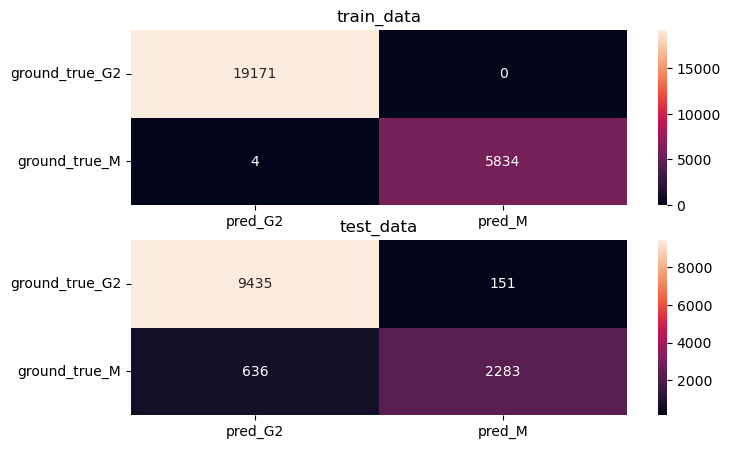

In [8]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.89126712 0.89640411 0.91438356 0.89726027 0.88356164 0.9135274
 0.89717224 0.9117395  0.88860326 0.89545844]  Mean:0.8989377545750138


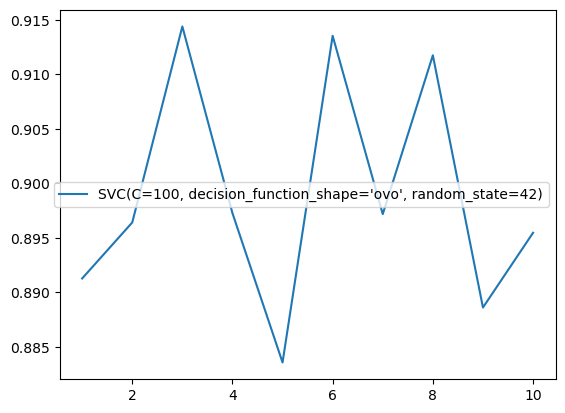

the accuracy of model run with train data 0.9241178485782803
the accuracy of model run with test data 0.8929427886262419


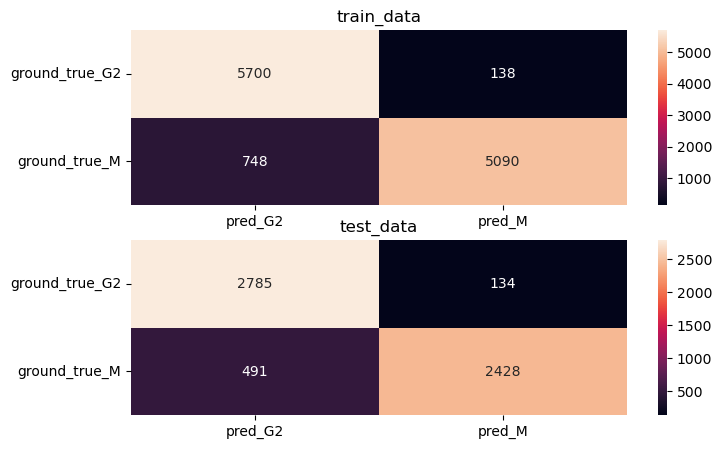

In [8]:


x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)





the accuracy of model run with train data 0.9241178485782803
the accuracy of model run with test data 0.8929427886262419


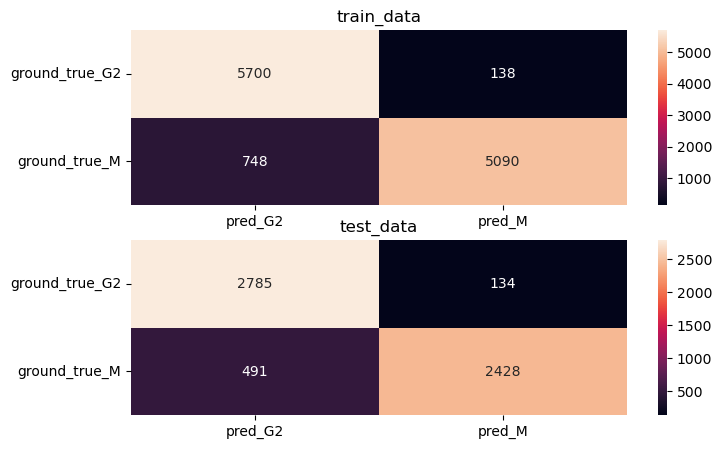

In [9]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_without_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_without_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [10]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
        'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,MM231,PRIM1,587.0,110.0,29263.282751,17870.227890,1.965725e+06,338.0,29263.282751,7318.073752,...,10492.253808,17280.102578,8690.288488,1,1.965725e+06,4.462238,0.978124,0.643305,0.946003,M
1,RPE-1,SCR,349.0,217.0,8669.976489,6432.873995,1.395934e+06,2288.0,8669.976489,1265.772291,...,5763.113301,13424.242447,5849.373408,1,1.395934e+06,3.033156,0.999667,1.985894,1.328800,G2
2,MM231,ZMAT5,87.0,112.0,34495.410898,19784.564911,2.215871e+06,351.0,34495.410898,8104.137344,...,14620.285030,24644.008222,13022.042790,1,2.215871e+06,4.222547,1.174154,0.683608,1.022629,M
3,U2OS,C1orf131,263.0,136.0,29928.434216,19122.669790,2.600683e+06,398.0,29928.434216,8746.299258,...,9942.756657,21514.081048,8350.789605,1,2.600683e+06,4.084298,0.995388,0.458019,0.810101,M
4,U2OS,siCdc27,315.0,87.0,48550.454136,31307.730609,2.723773e+06,215.0,48550.454136,16492.061070,...,19646.856569,29593.449923,12287.176500,1,2.723773e+06,3.861009,1.179375,0.334918,0.529687,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,RPE-1,NT,389.0,203.0,17730.900554,10198.555204,2.070307e+06,1630.0,17730.900554,2751.121904,...,7920.910961,15376.588355,7668.042007,1,2.070307e+06,3.895513,1.099592,1.122503,1.196730,M
10909,MM231,CDC27,329.0,127.0,23741.590312,18338.210986,2.328953e+06,447.0,23741.590312,7338.841643,...,15721.668981,35327.471671,16155.001728,1,2.328953e+06,4.438035,1.015029,0.870578,1.159588,M
10910,MM231,ZMAT5,131.0,120.0,22943.734176,15090.695896,1.810884e+06,563.0,22943.734176,4759.688883,...,9182.490740,17410.365129,9448.129993,1,1.810884e+06,3.450806,0.970482,1.096499,1.095674,G2
10911,RPE-1,QRICH1,261.0,124.0,28027.373185,15894.156865,1.970875e+06,619.0,28027.373185,4422.967763,...,8161.452933,13404.503118,5976.296661,1,1.970875e+06,4.282419,1.249217,0.537268,0.759314,M


the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.91071429 0.90934066 0.90934066 0.90934066 0.89835165 0.9215956
 0.91471802 0.91746905 0.9215956  0.91059147]  Mean:0.9123057650739905


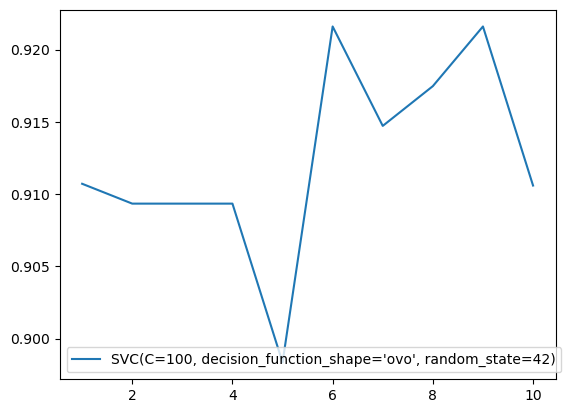

the accuracy of model run with train data 0.9539518900343643
the accuracy of model run with test data 0.914238592633315


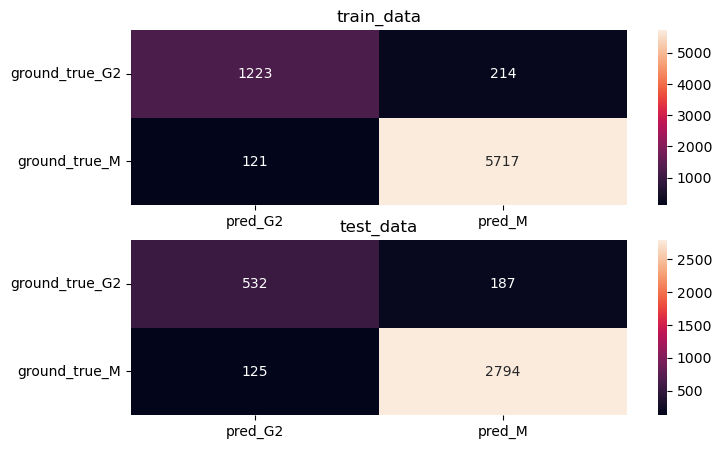

In [11]:


x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 0.9539518900343643
the accuracy of model run with test data 0.914238592633315


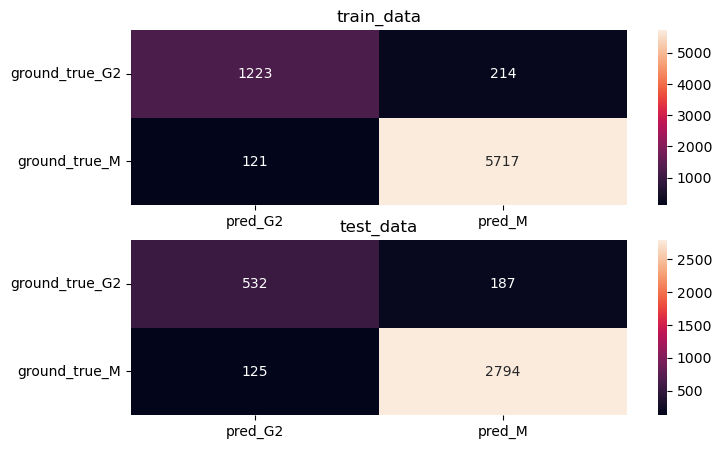

In [12]:
from joblib import dump, load
dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)